# Classify length of stay of patient

### COSC2753 - Machine learning - Assignment 1  
**Tran Minh Quang - s3757281**

## Introduction

The COVID-19 catalyst have caused a tremedous pressure on the healthcare system of many countries in the world, even developed countries such as United State (USA) or China are struggling in managing and distributing the resource in the hospital. Hence, in this notebook, we will try to apply machine learning techniques to predict when will the patient is likely to leave the hospital using classification models. In the following sections, some data cleanning task is executed to make the raw data fit to train the model, and data modelling process which are hyperparameter tunning, model trainning, model evaluation and model selection is applied to find the best model for our question.

## Material and methods

### Data set

The original data set is take from HealthData: Hospital Inpatient Discharges (SPARCS De-Identified). There are 15 collumns in the data set as described as below:

| Column   Name                | Attribute/Target | Description                                                                                                                                                                                                  |
|------------------------------|------------------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| ID                           | N/A              | Unique number to represent patient ID                                                                                                                                                                        |
| HealthServiceArea            | N/A              | A description of the Health Service Area (HSA) in which the hospital is located. Capital/Adirondack, Central NY, Finger   Lakes, Hudson Valley, Long Island, New York City, Southern Tier, Western NY.       |
| Gender                       | Attribute 1      | Patient gender:   (M) Male, (F) Female, (U) Unknown.                                                                                                                                                         |
| Race                         | Attribute 2      | Patient race. Black/African American, Multi, Other Race, Unknown, White. Other Race   includes Native Americans and Asian/Pacific Islander.                                                                  |
| TypeOfAdmission              | Attribute 3      | A description of   the manner in which the patient was admitted to the health care facility:   Elective, Emergency, Newborn, Not Available, Trauma, Urgent.                                                  |
| CCSProcedureCode             | Attribute 4      | AHRQ Clinical Classification Software (CCS) ICD-9 Procedure Category Code                                                                                                                                    |
| APRSeverityOfIllnessCode     | Attribute 5      | All Patient  Refined Severity of Illness (APR SOI) Description: Minor (1), Moderate (2),   Major (3), Extreme (4)                                                                                            |
| PaymentTypology              | Attribute 6      | A description of the type of payment for this occurrence.                                                                                                                                                    |
| BirthWeight                  | Attribute 7      | The neonate birth weight in grams; rounded to nearest 100g.                                                                                                                                                  |
| EmergencyDepartmentIndicator | Attribute 8      | Emergency Department Indicator is set based on the submitted revenue codes. If the   record contained an Emergency Department revenue code of 045X, the indicator   is set to "Y", otherwise it will be “N”. |
| AverageCostInCounty          | Attribute 9      | Average hospitalization Cost In County of the patient                                                                                                                                                        |
| AverageChargesInCounty       | Attribute 10     | Average medical Charges In County of the patient                                                                                                                                                             |
| AverageCostInFacility        | Attribute 11     | Average Cost In Facility                                                                                                                                                                                     |
| AverageChargesInFacility     | Attribute 12     | Average Charges In Facility                                                                                                                                                                                  |
| AverageIncomeInZipCode       | Attribute 13     | Average Income In Zip Code                                                                                                                                                                                   |
| LengthOfStay                 | target           | The total number  of patient days at an acute level and/or other than acute care level. Need to be transformed to match the task class 0 id LengthOfStay < 4 and class 1 otherwise                           |

From this data set, we will use 13 attributes to predict the length of stay (LOS) of a patient. 

### Methodologies 


In this assignment, using the given data set, we will try different models to predict the LOS of a patient to find the best model for this problems. Several machine learning models is applied in this notebook, from basic supervised classifier such as naive bayes, logistic regression to complex one such as histogram gradient boosting, k-nearest neighbour and neural network model MLP classifier. A breif explaination of applied model is stated below:  
* `Gaussian Naive Bayes`: Naive Bayes model make prediction based on the bayes' theorem by calculating the probability of hypothesis given our prior information. Gaussian Naive Bayes is a variant of naive bayes which have an assumption is the continuous data is gaussian distribution.   
                                            P(A|B) = (P(B|A) * P(A)) / P(B)  
* `Logistics Regression`: This is the linear regression approach for classification problems. It use to model the probability of a binary class. Similar to linear regression, it use each of the input feature with assigned weight to make prediction, however, the logistic regresion use a sigmoid function and its output is 1 and 0:  
$$\frac{1}{1 + e^{-x}}$$  
* `K-nearest neighbour (KNN)`: KNN is a non-linear supervised learning model that learn all available cases and makes predictions based on similarity (distance function).    
* `Adaboost Classifier`: Adaptive Boosting algorithm is an algorithm ultilizes the boosting emsemble method on machine learning to reduce bias and variance.  
* `LightGBM`: A high performance gradient boosting method based on decision tree algorithm mainly applied for ranking and classification problems.
* `Random Forest`: Random forest is a machine learning model made up with many decision trees with two main concepts which is the model random sampling the data when building trees and use random subset of features when splitting nodes.  * `Emsemble method`: After train all of the model above, we will try to stack all the model to improve the prediction accuraccy.   

As stated above, since there are several models is applied in this notebook, we will list some of evaluation metrics used in this notebook for evaluate models:  
* `Confusion Matrix`: A matrix contains 4 keys metrics of classification which are true positive (TP), false positive (FP), true negative (TN), false negative (FN). 
* `Accuracy score`: The number of correct prediction:  
$$\frac{TP + TN}{TP + TN + FP + FN}$$  
* `F1 Score`: A metric that illustrated both precision and recall:  
$$2*\frac{precision * recall}{precision + recall}$$  
* `Decision Threshold & Receiver Operating Characteristic (ROC) curve`: ROC curve summary the trade off between true positive rate and false positive rate with different threshold  

Since our problems is to predicted the duration of stay of a patient in the hospital is over or under 3 days, the hospital will be overloaded, therefore the cost of False positive which predicts patient's LOS over 3 when they should be discharge from the hospital within 3 days, will cause the manager to make uneccessary and costly methods. Thus, another metric we need to considered is the number of false positive in the confusion matrix. If the number of False positive is higher, than the model will not appropriate for this problems. In other word, we try to make model with high accuraccy in true positive.

## Data preprocessing

In this part there are 4 main steps in this stage. Firstly, we have to change the target collumn to discrete value which contain only 0 and 1, 0 represented length of stay under or equal 3 days, otherwise the value is 1. Secondly, There exist some categorical features in the data set, hence, we have to one hot encoded all of these features. Next, we have to separate the train data set into train and validation data set with the ratio 80/20. Finally, since there exist the imbalance in the target, we have to balancin the data set with `imblearn` package.

In [1]:
# import library for data preprocessing
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from numpy import mean
from numpy import std
from numpy import percentile
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

#### Read data from file

In [2]:
# read data from file
data = pd.read_csv("./data/train_data.csv")
data = data.drop(['HealthServiceArea', 'ID'], axis=1)
data

,Gender,Race,TypeOfAdmission,CCSProcedureCode,APRSeverityOfIllnessCode,PaymentTypology,BirthWeight,EmergencyDepartmentIndicator,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
0,F,Other Race,Newborn,228,1,Medicaid,3700,N,2611,9227,1751,8951,45,1
1,M,Black/African American,Newborn,228,1,Medicaid,2900,N,3242,8966,3338,6409,34,1
2,M,Other Race,Newborn,220,1,Private Health Insurance,3200,N,3155,11381,4980,9323,45,1
3,F,Other Race,Newborn,0,1,Private Health Insurance,3300,N,3155,11381,5826,15680,59,1
4,F,Other Race,Newborn,228,1,Medicaid,2600,N,2611,9227,6000,14344,59,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59961,M,Black/African American,Newborn,115,1,Blue Cross/Blue Shield,3600,N,1826,4190,1551,3715,36,4
59962,M,White,Newborn,115,2,Blue Cross/Blue Shield,3300,N,1826,4190,1551,3715,55,6
59963,M,White,Newborn,115,2,Blue Cross/Blue Shield,3400,N,1826,4190,1551,3715,55,4
59964,M,White,Newborn,-1,2,Medicaid,3100,N,1826,4190,1551,3715,55,4


In [3]:
data.describe()

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,LengthOfStay
count,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000,59966.000000
mean,155.404229,1.254594,3336.298903,2372.806690,7979.126922,2396.414318,7958.472668,59.811143,2.538405
std,89.541978,0.546207,446.244475,639.755096,3220.291347,1248.501189,3859.294711,21.470170,1.171246
min,-1.000000,1.000000,2500.000000,712.000000,1243.000000,457.000000,1120.000000,28.000000,1.000000
25%,115.000000,1.000000,3000.000000,2041.000000,4620.000000,1551.000000,4438.000000,45.000000,2.000000
50%,220.000000,1.000000,3300.000000,2533.000000,9227.000000,1967.000000,7945.000000,55.000000,2.000000
75%,228.000000,1.000000,3600.000000,2785.000000,10644.000000,2895.000000,11619.000000,74.000000,3.000000
max,231.000000,4.000000,7500.000000,3242.000000,11381.000000,8114.000000,18466.000000,115.000000,10.000000


#### Transform target to binary

In [4]:
# convert original target feature (LengthOfStay) to binary options
data.LengthOfStay[data.LengthOfStay <= 3] = 0
data.LengthOfStay[data.LengthOfStay > 3] = 1

#### Data cleanning

Before use data in data modelling process, several prior work we have to make with the raw data to make it valid to fit with the model which are: 
* Remove oulier from the data set
* One hot encoded categorical features

In [5]:
# Get list of categorical variables
s = (data.dtypes == 'object')
categorical_cols = list(s[s].index)

print(categorical_cols)

['Gender', 'Race', 'TypeOfAdmission', 'PaymentTypology', 'EmergencyDepartmentIndicator']


In [6]:
# Data preprocessing
def preprocessingData(data):
    '''
    Modify the data to increase the accuracy of model
    INPUT:
    data: the raw data set
    OUTPUT:
    df: cleaned data set
    '''
    df = data.copy()
    
    # Get list of categorical variables
    s = (df.dtypes == 'object')
    categorical_cols = list(s[s].index)
    
    # calculate summary statistics
    data_25, data_75 = percentile(df['BirthWeight'], 25), percentile(df['BirthWeight'], 75)
    iqr = data_75 - data_25
    birthweight_cut_off = iqr * 1.5
    
    birthweight_lower, birthweight_upper = data_25 - birthweight_cut_off, data_75 + birthweight_cut_off
    df = df[(df['BirthWeight'] >= birthweight_lower) & (df['BirthWeight'] <= birthweight_upper)]
    
    # identify outliers for averageCostInCounty_mean
    averageCostInCounty_25, averageCostInCounty_75 = percentile(df['AverageCostInCounty'], 25), percentile(df['AverageCostInCounty'], 75)
    averageCostInCounty_iqr = averageCostInCounty_75 - averageCostInCounty_25
    averageCostInCounty_cut_off = averageCostInCounty_iqr * 1.5
    averageCostInCounty_lower, averageCostInCounty_upper = averageCostInCounty_25 - averageCostInCounty_cut_off, averageCostInCounty_75 + averageCostInCounty_cut_off
    # Remove outliers
    df = df[(df['AverageCostInCounty'] >= averageCostInCounty_lower) & (df['AverageCostInCounty'] <= averageCostInCounty_upper)]
    
    # identify outliers for averageCostInFacility
    averageCostInFacility_25, averageCostInFacility_75 = percentile(df['AverageCostInFacility'],25), percentile(df['AverageCostInFacility'], 75)
    averageCostInFacility_iqr = averageCostInFacility_75 - averageCostInFacility_25
    averageCostInFacility_cut_off = averageCostInFacility_iqr * 1.5
    averageCostInFacility_lower, averageCostInFacility_upper = averageCostInFacility_25 - averageCostInFacility_cut_off, averageCostInFacility_75 + averageCostInFacility_cut_off
    # Remove outliers
    df = df[(df['AverageCostInFacility'] >= averageCostInFacility_lower) & (df['AverageCostInFacility'] <= averageCostInFacility_upper)]
    
    # One hot encoded categorical features
    df = pd.get_dummies(df, columns = categorical_cols)

    return df


In [7]:
data = preprocessingData(data)

#### Split the data

Next we have to split the original data to train set and validation set with a ratio 80/20. The train set is used to train the data where the val set is used to evaluate the model performance and compare different models.

In [8]:
# Separate the train data to train and validation data set with ratio 80/20
y = data['LengthOfStay']
X = data.drop(['LengthOfStay'], axis=1)
X_train, X_val, y_train, y_val = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

#### Over Sampling

In [67]:
data['LengthOfStay'].value_counts()

0    44592
1     8853
Name: LengthOfStay, dtype: int64

The target of this data set show imbalance which can cause bias to the model which is affect our final prediction, therefore, we have to balancing the target of the data set by over sampling method using `imblearn` package. We applied SMOTE technique which first selects a minority class instance a at random and finds its k nearest minority class neighbors. Then it will created sample based on the K nearest neighbour class. 

In [9]:
# Over sampling train data to avoid imbalance data set
from imblearn.over_sampling import SMOTE

df = pd.concat([X_train, y_train], axis=1)

sm = SMOTE(sampling_strategy='minority', random_state=7)

# Fit the model to generate the data.
oversampled_trainX, oversampled_trainY = sm.fit_sample(df.drop('LengthOfStay', axis=1), df['LengthOfStay'])
oversampled_train = pd.concat([pd.DataFrame(oversampled_trainY), pd.DataFrame(oversampled_trainX)], axis=1)
oversampled_train['LengthOfStay'].value_counts()

1    35691
0    35691
Name: LengthOfStay, dtype: int64

<AxesSubplot:>

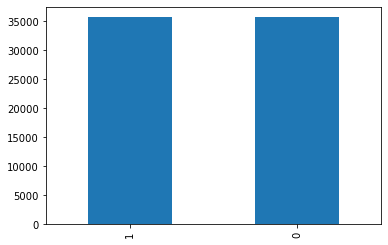

In [10]:
oversampled_train['LengthOfStay'].value_counts().plot(kind='bar')

In [11]:
X_train = oversampled_trainX.copy()
y_train = oversampled_trainY.copy()

The lightgbm model does not accept feature name with json syntax, so we have to eliminate its.

In [12]:
# remove inappropriate syntax
import re
X_train = X_train.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
X_train

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,...,PaymentTypology_FederalStateLocalVA,PaymentTypology_ManagedCareUnspecified,PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_MiscellaneousOther,PaymentTypology_PrivateHealthInsurance,PaymentTypology_SelfPay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,228,1,4400,2785,10644,1069,11619,96,1,0,...,0,0,0,0,0,1,0,0,1,0
1,228,2,3400,3242,8966,3865,6687,34,1,0,...,0,0,1,0,0,0,0,0,1,0
2,0,1,2600,1445,3419,557,2179,45,1,0,...,0,0,0,0,0,1,0,0,1,0
3,228,1,4100,2208,10134,1686,7945,59,1,0,...,0,0,1,0,0,0,0,0,1,0
4,0,1,3500,2533,3320,2533,3320,52,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71377,223,1,2956,3242,8966,2448,13196,34,1,0,...,0,0,1,0,0,0,0,0,1,0
71378,0,1,2500,2533,3320,2533,3320,56,1,0,...,0,0,0,0,0,0,0,0,1,0
71379,228,1,2745,1371,5463,1157,4438,62,0,0,...,0,0,0,0,0,1,0,0,1,0
71380,230,1,3300,3155,11381,2895,13394,65,0,0,...,0,0,0,0,0,0,0,0,1,0


## Data Modelling

In this part, we will train the model and perform hyperparameter tunning using `GridSearchCV` to choose the best parameter for the model. In the evaluation metrics, we will use accuraccy, f1-score, recall score and ROC curve to examine the performance of the model. Another factor to consider is the trainning time.

In [13]:
# Import ML library
from sklearn.metrics import classification_report, f1_score, accuracy_score, recall_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
from sklearn.preprocessing import RobustScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

import pickle

In [14]:

def evaluate_model_performance(clf, X_train, y_train):
    '''evaluate a model's accuracy and F1-score
    INPUT:
    clf - Model object
    X_train - Training data matrix
    y_train - Expected model output vector
    OUTPUT:
    clf_accuracy: Model accuracy
    clf_f1_score: Model F1-score
    '''
    y_pred_rf = clf.predict(X_train)
    clf_accuracy = accuracy_score(y_train, y_pred_rf)
    clf_f1_score = f1_score(y_train, y_pred_rf)
    clf_recall_score = recall_score(y_train, y_pred_rf, average='binary')
    print("model accuracy: %.3f" % (clf_accuracy))
    print("model f1-score: %.3f" % (clf_f1_score))
    print("model recall-score: %.3f" % (clf_recall_score))

    return clf_accuracy, clf_f1_score, clf_recall_score

In [15]:
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve

def plot_ROC(y_train_true, y_train_prob, y_test_true, y_test_prob):
    '''
    a funciton to plot the ROC curve for train labels and test labels.
     INPUT:
    y_train_true: True binary labels of 0 or 1 in the training dataset
    y_train_prob: Probability in range {0,1} predicted by the model for the training dataset
    y_test_true: True binary labels of 0 or 1 in the testing dataset
    y_test_prob: Probability in range {0,1} predicted by the model for the testing dataset
    '''
    fpr_train, tpr_train, thresholds_train = roc_curve(y_train_true, y_train_prob, pos_label =True)
    sum_sensitivity_specificity_train = tpr_train + (1-fpr_train)
    best_threshold_id_train = np.argmax(sum_sensitivity_specificity_train)
    best_threshold = thresholds_train[best_threshold_id_train]
    best_fpr_train = fpr_train[best_threshold_id_train]
    best_tpr_train = tpr_train[best_threshold_id_train]
    y_train = y_train_prob > best_threshold

    cm_train = confusion_matrix(y_train_true, y_train)
    acc_train = accuracy_score(y_train_true, y_train)
    auc_train = roc_auc_score(y_train_true, y_train)

    print ('Train Accuracy: %s ' %acc_train)
    print ('Train AUC: %s ' %auc_train)
    print ('Train Confusion Matrix:')
    print (cm_train)

    fig = plt.figure(figsize=(20,5))
    ax = fig.add_subplot(121)
    curve1 = ax.plot(fpr_train, tpr_train)
    curve2 = ax.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax.plot(best_fpr_train, best_tpr_train, marker='o', color='black')
    ax.text(best_fpr_train, best_tpr_train, s = '(%.3f,%.3f)' %(best_fpr_train, best_tpr_train))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Train), AUC = %.4f'%auc_train)

    fpr_test, tpr_test, thresholds_test = roc_curve(y_test_true, y_test_prob, pos_label =True)

    y_test = y_test_prob > best_threshold

    cm_test = confusion_matrix(y_test_true, y_test)
    acc_test = accuracy_score(y_test_true, y_test)
    auc_test = roc_auc_score(y_test_true, y_test)

    print ('Test Accuracy: %s ' %acc_test)
    print ('Test AUC: %s ' %auc_test)
    print ('Test Confusion Matrix:')
    print (cm_test)

    tpr_score = float(cm_test[1][1])/(cm_test[1][1] + cm_test[1][0])
    fpr_score = float(cm_test[0][1])/(cm_test[0][0]+ cm_test[0][1])

    ax2 = fig.add_subplot(122)
    curve1 = ax2.plot(fpr_test, tpr_test)
    curve2 = ax2.plot([0, 1], [0, 1], color='navy', linestyle='--')
    dot = ax2.plot(fpr_score, tpr_score, marker='o', color='black')
    ax2.text(fpr_score, tpr_score, s = '(%.3f,%.3f)' %(fpr_score, tpr_score))
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve (Test), AUC = %.4f'%auc_test)
    plt.show()

    return best_threshold


### Hyperparameter Tunning and Model Evaluation

In [16]:
model_score = []


#### 1. Gaussian Naive Bayes

The first algorithm we use is a basic and fast classification model based on the Naive Bayes' theorem which will calculate the probability of the hypothesis based on the prior knowledge. The mathematics expression behind the model is from the Naive Bayes' theorem expression:  
$$P(hypothesis/data) = \frac{ (P(data|hypothesis) * P(hypothesis))}{P(data)}$$  
We will use the theorem to calculate the probability of different hypothesiss and find one with highest probability, the maximum hypothesis and can be called formally as the maximum a posteriori (MAP) hypothesis which is:
$$MAP(hypothesis) = max(P(data|hypothesis) * P(hypothesis))$$  
The Naive bayes model applied below is a variant of orginal naive bayes with added an assumption is the data is Gaussian Distribution. Since the Naive Bayes model have a very strong assumption above the data so most of the time, the prediction accuracy is low. However, since it is fast to train, so I try to train the naive bayes first to have an overview about the data set and see if there is a problem exist in the data set that can have significant effect to the prediction result.

In [17]:
%%time
from sklearn.naive_bayes import GaussianNB

nb_clf =  GaussianNB()

nb_clf.fit(X_train, y_train)  

print('Best Score: ', nb_clf.score(X_val, y_val))

Best Score:  0.317990457479652
CPU times: user 51.5 ms, sys: 23 ms, total: 74.4 ms
Wall time: 73.9 ms


In [18]:
acc, f1, recall = evaluate_model_performance(nb_clf, X_val, y_val)
model_score.append(['Gaussian Naive Bayes', acc, f1, recall])

model accuracy: 0.318
model f1-score: 0.296
model recall-score: 0.857


Train Accuracy: 0.7167072931551371 
Train AUC: 0.7167072931551371 
Train Confusion Matrix:
[[28140  7551]
 [12671 23020]]
Test Accuracy: 0.7296285901393956 
Test AUC: 0.6090503178513236 
Test Confusion Matrix:
[[7034 1867]
 [1023  765]]


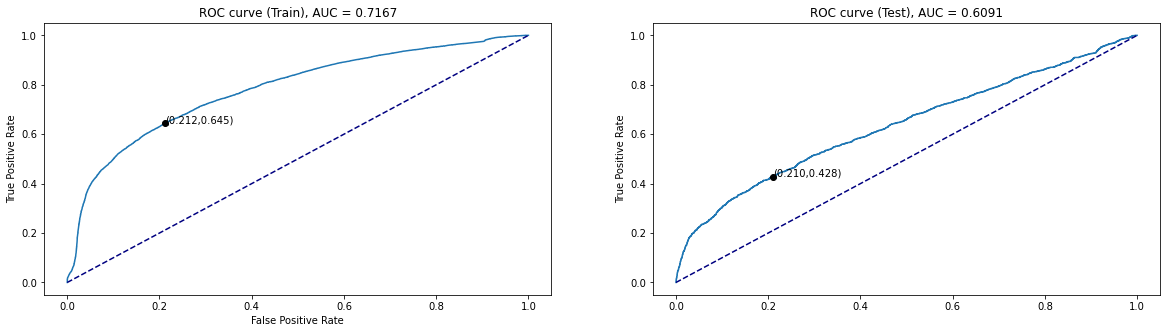

0.9094881299696276

In [19]:
y_test_pred_proba = nb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = nb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

From the result, one of the most important thing we can see is the data have no problems which can cause bias or variance, the performance of model on validation data set is smaller than in the train data set but the different is small. The model performance is fine which is expected since the algorithm have a strong assumption about the data. Next, we have to examine the confusion matric of the model 

In [20]:
with open("model/nb_clf.pkl", 'wb') as file:
    pickle.dump(nb_clf, file)

#### 2. Logistic regression

Logistic regression is a classification using linear approach with a logistic function (sigmoid function):  
$$\frac{1}{1+e^{-x}}$$  
The logistic regression used an equation such as linear regression, it also have a weight value for the variable. However there are two key different between linear regression and logistic regression: the hythesis equation of the logistic regression is in sigmoid form and the predicted value is from 0 and 1. The example of the logistic regression is:  
$$\frac{1}{1+e^{-\theta X}}$$  
Since the main objective of this notebook is to evaluate the logistic regression compare to other classification model so to increase the model performancem we have to perform hyperparameter tunning to set the best configuration to have highest probability. 
* `solver`: Algorithm use to optimization. In this problem since the data is big with approx 70000 records and done have any problems as stated above, I choose The parameters I choose are:  Limited-memory Broyden–Fletcher–Goldfarb–Shanno Algorithm (lbfgs) and a Library for Large Linear Classification (liblinear).   
* `penalty`: The regularization to advoid over and underfitting issue, I choose l2 regularization because it is used with two above mentioned solver.  
* `C`: the regulation strength  
* `max_iter`: The maximum iteration to solver to converge, since the data have 13 features and 70000 records, thus, I assump that it take many interation to converge.

In [21]:
%%time

model =  LogisticRegression()

parameters = {
    'penalty': ['l2'],
    'solver': ['lbfgs', 'liblinear'],
    'C': [ 0.01, 0.1, 10, 100],
    'max_iter': [5000, 10000, 20000]
}

log_reg = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 10, n_jobs = 4)
log_reg.fit(X_train, y_train)

print('Best Score: ', log_reg.best_score_*100, '\nBest Parameters: ', log_reg.best_params_)


Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   37.6s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  4.6min
[Parallel(n_jobs=4)]: Done 240 out of 240 | elapsed:  5.9min finished


Best Score:  82.4305090004977 
Best Parameters:  {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
CPU times: user 3.03 s, sys: 295 ms, total: 3.32 s
Wall time: 5min 59s


In [22]:
acc, f1, recall = evaluate_model_performance(log_reg, X_val, y_val)
model_score.append(['Logistic regression', acc, f1, recall])

model accuracy: 0.832
model f1-score: 0.286
model recall-score: 0.202


Train Accuracy: 0.8329130593146732 
Train AUC: 0.8329130593146732 
Train Confusion Matrix:
[[34102  1589]
 [10338 25353]]
Test Accuracy: 0.830947703246328 
Test AUC: 0.5822864899426881 
Test Confusion Matrix:
[[8509  392]
 [1415  373]]


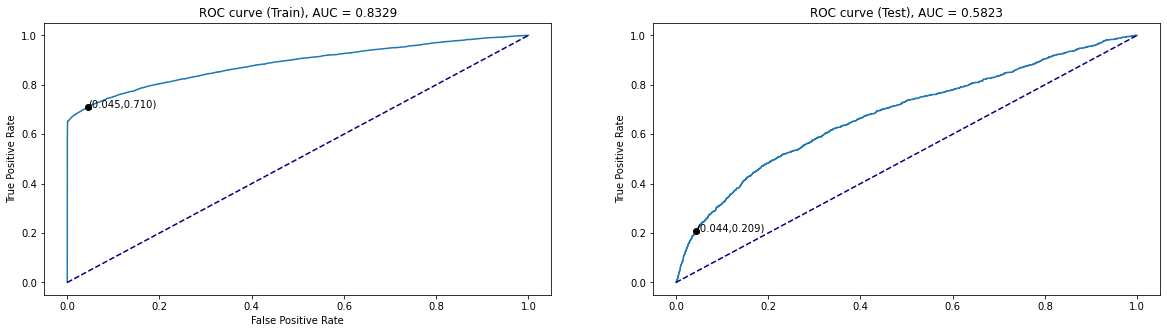

0.49297471270813153

In [23]:
y_test_pred_proba = log_reg.predict_proba(X_val)[::,1]
y_train_pred_proba = log_reg.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

As we can see, overall the model performance is good with over 80% accuraccy and have score 0.886 when I submit in Kaggle competition. The number of false positive is low, therefore, we can conclude that logistic regression is a decent model and can perform well in this problem. However we need to compare the performance of logistic regression with other model before to see how it perform when comparing with other models when applied in this problems.

In [24]:
with open("model/log_reg.pkl", 'wb') as file:
    pickle.dump(log_reg, file)

#### 3. AdaBoostClassifier

The core of Adaboost is to combine the sequence of weak learners, then its combine all of the prediction through a weighted majority sum to produce final prediction. After each iteration, the weight is changed to reduce error rate. From that, I choose two parameters to tune which are:  
* `n_estimator`: the number of weak learners. The higher number of weak learner the lower error rate.
* `learning_rate`: Control the contribution of weak learners 

In [25]:
%%time

model = AdaBoostClassifier()

parameters = {
    'n_estimators': [200, 300, 500, 600, 800],
    'learning_rate':[0.001, 0.1, 0.2, 0.5]
}

ada_clf = GridSearchCV(model, parameters, refit=True, verbose=1, cv = 10, n_jobs = 4)
ada_clf.fit(X_train, y_train)

print('Best Score: ', ada_clf.best_score_*100, '\nBest Parameters: ', ada_clf.best_params_)

Fitting 10 folds for each of 20 candidates, totalling 200 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  4.4min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed: 19.0min
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed: 20.1min finished


Best Score:  83.8804349417332 
Best Parameters:  {'learning_rate': 0.5, 'n_estimators': 800}
CPU times: user 28.6 s, sys: 233 ms, total: 28.8 s
Wall time: 20min 35s


In [26]:
acc, f1, recall = evaluate_model_performance(ada_clf, X_val, y_val)
model_score.append(['Adaboost classifier', acc, f1, recall])

model accuracy: 0.833
model f1-score: 0.321
model recall-score: 0.236


Train Accuracy: 0.8494718556498837 
Train AUC: 0.8494718556498837 
Train Confusion Matrix:
[[33291  2400]
 [ 8345 27346]]
Test Accuracy: 0.8275797548882028 
Test AUC: 0.6222763410189188 
Test Confusion Matrix:
[[8285  616]
 [1227  561]]


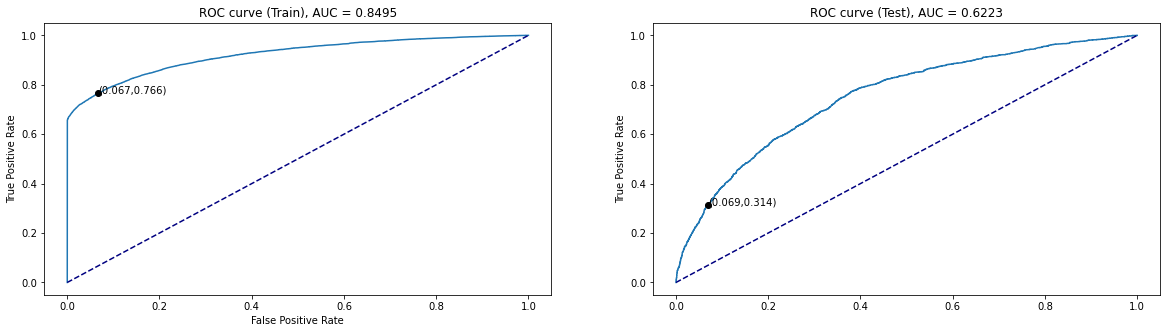

0.4998766153192501

In [27]:
y_test_pred_proba = ada_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = ada_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

The result is excelent with very high accuracy 85% and also the accuraccy score on Kaggle competition is over 0.9. The ROC curve also show there is not exist any problems in overfitting or underfitting and the false positive is low. From the result, the author believe that adaboost is one of the best model in this problems.

In [28]:
with open("model/ada_clf.pkl", 'wb') as file:
    pickle.dump(ada_clf, file)

#### 4. K Neighbors Classifier

` KNeighborsClassifier` is based on k nearest neighbours (KNN) algorithm which is a non-parametric and lazy learning algorithm. This machine learning methods is not made any prior assumption about the data and they done need any trainning data point for make the model. In KNN classifier, the basic step of the algorithm are: 
1. Calculate the distance by a chosen methods such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance 
2. Find closest neighbour 
3. Vote for labels  

From the algorithms principle, three most important parameter is tunned are: 
* `n_neighbors`: number of neighbors used for queries 
* `weights`: weight function used in prediction 
* `metric`: the distance metric to use for the tree.

In [29]:
from sklearn.neighbors import KNeighborsClassifier

model =  KNeighborsClassifier()

parameters = { 
    'n_neighbors':[1, 3, 5, 10, 15],
    'weights':['uniform', 'distance'],
    'metric':['euclidean', 'manhattan', 'minkowski'] 
}

knn_clf= GridSearchCV(model, parameters, refit=True, verbose=1, cv = 10, n_jobs = 4)
knn_clf.fit(X_train, y_train)

print('Best Score: ', knn_clf.best_score_*100, '\nBest Parameters: ', knn_clf.best_params_)


Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    9.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   41.0s
[Parallel(n_jobs=4)]: Done 300 out of 300 | elapsed:  1.1min finished


Best Score:  83.95992306004952 
Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}


In [30]:
acc, f1, recall = evaluate_model_performance(knn_clf, X_val, y_val)
model_score.append(['K-Nearest neighbours classifier', acc, f1, recall])

model accuracy: 0.763
model f1-score: 0.290
model recall-score: 0.290


Train Accuracy: 0.9561794289877 
Train AUC: 0.9561794289876999 
Train Confusion Matrix:
[[35505   186]
 [ 2942 32749]]
Test Accuracy: 0.788006361680232 
Test AUC: 0.5520334982344944 
Test Confusion Matrix:
[[8070  831]
 [1435  353]]


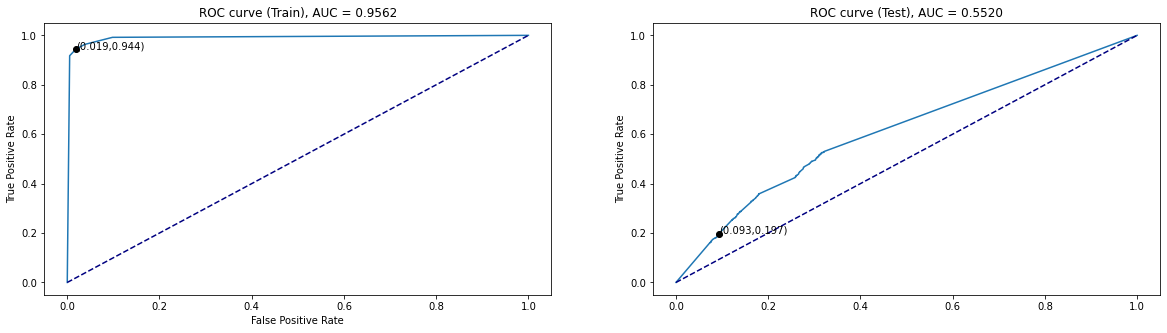

0.6666666666666666

In [31]:
y_test_pred_proba = knn_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = knn_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

The metric show that KNNClassifier have very high accuracy and f1 score, the ROC curve show a quite large different in the model performance between train set and test set which prove that the model is slightly overfit the train data set. 

In [32]:
with open("model/knn_clf.pkl", 'wb') as file:
    pickle.dump(knn_clf, file)

#### 5. Random Forest Classifier

The Random Forest Classifier is the averaging algorithm based on randomize decision trees. The model will split the data randomly and construct a decision tree based on each sub set of data, then it will perform voting and make prediction. In parameter tunning, several parameters is tunned:
* `n_estimators`: number of sub trees 
* `max_features`: number of features to consider in each sub trees 
* `max_depth`: the maximum depth of the trees 
* `min_samples_split`: the minimum number of samples require to split a node 
* `min_samples_leaf`: The minimum number of samples required to be at a leaf node

In [33]:
from sklearn.ensemble import RandomForestClassifier

model =  RandomForestClassifier()

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

parameters = {'n_estimators': [100, 200, 300],
               'max_features': ['auto', 'sqrt'],
               'max_depth': max_depth,
               'min_samples_split': [2, 5],
               'min_samples_leaf': [1, 2] }

rf_clf= GridSearchCV(model, parameters, refit=True, verbose=1, cv = 10, n_jobs = 4)
rf_clf.fit(X_train, y_train)

print('Best Score: ', rf_clf.best_score_*100, '\nBest Parameters: ', rf_clf.best_params_)




Fitting 10 folds for each of 288 candidates, totalling 2880 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:  1.3min
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:  6.4min
[Parallel(n_jobs=4)]: Done 442 tasks      | elapsed: 18.4min
[Parallel(n_jobs=4)]: Done 792 tasks      | elapsed: 37.7min
[Parallel(n_jobs=4)]: Done 1242 tasks      | elapsed: 60.6min
[Parallel(n_jobs=4)]: Done 1792 tasks      | elapsed: 88.5min
[Parallel(n_jobs=4)]: Done 2442 tasks      | elapsed: 121.4min
[Parallel(n_jobs=4)]: Done 2880 out of 2880 | elapsed: 143.6min finished


Best Score:  87.65302459181137 
Best Parameters:  {'max_depth': 70, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}


In [34]:
acc, f1, recall = evaluate_model_performance(rf_clf, X_val, y_val)
model_score.append(['Random Forest', acc, f1, recall])

model accuracy: 0.807
model f1-score: 0.330
model recall-score: 0.285


Train Accuracy: 0.9525650724272225 
Train AUC: 0.9525650724272225 
Train Confusion Matrix:
[[34304  1387]
 [ 1999 33692]]
Test Accuracy: 0.7979230985124894 
Test AUC: 0.6120672852533725 
Test Confusion Matrix:
[[7934  967]
 [1193  595]]


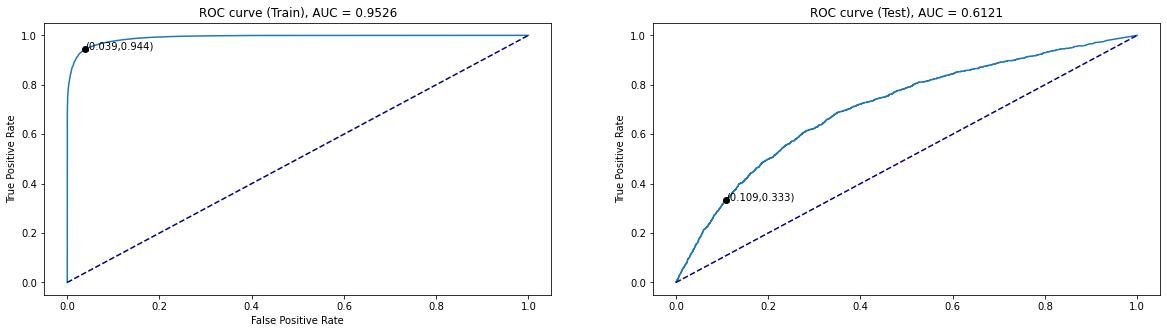

0.4586448412698417

In [35]:
y_test_pred_proba = rf_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = rf_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

Similar to KNNclassifier, the model show exelent performance in te train set and it have decrease quit significant in the validation set which prove that the model is overfit the data in general 

In [36]:
with open("model/rf_clf.pkl", 'wb') as file:
    pickle.dump(rf_clf, file)

#### 6. LightGBM

The lightGBM is an gradient boosting model uses tree based learning algorithms. It is widely known as the more efficient version of XGBoosting model and can have great performance when dealing with large data set. 

In [39]:
import lightgbm as lgb 

model = lgb.LGBMClassifier()
# Create parameters to search
gridParams = {
    'learning_rate': [0.01, 0.1, 0.001],
    'max_depth': [5, 10, 15, None],
    'min_data_in_leaf': [30, 50, 100],
    'boosting_type': ['gbdt', 'dart']
    }

# To view the default model params:
model.get_params().keys()

# Create the grid
lgb_clf = GridSearchCV(model, gridParams,
                    verbose=1,
                    cv = 5,
                    n_jobs = 4)
# Run the grid
lgb_clf.fit(X_train, y_train)

# Print the best parameters found
print(lgb_clf.best_params_)
print(lgb_clf.best_score_)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:   10.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:   44.4s
[Parallel(n_jobs=4)]: Done 360 out of 360 | elapsed:  2.3min finished


[LightGBM] [Warning] min_data_in_leaf is set=30, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=30
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
{'boosting_type': 'gbdt', 'learning_rate': 0.1, 'max_depth': 10, 'min_data_in_leaf': 30}
0.8442778566486219


In [41]:
acc, f1, recall = evaluate_model_performance(lgb_clf, X_val, y_val)
model_score.append(['LightGBM', acc, f1, recall])

model accuracy: 0.837
model f1-score: 0.356
model recall-score: 0.268


Train Accuracy: 0.8781205345885518 
Train AUC: 0.8781205345885518 
Train Confusion Matrix:
[[33386  2305]
 [ 6395 29296]]
Test Accuracy: 0.8300121620357377 
Test AUC: 0.6322286576653404 
Test Confusion Matrix:
[[8273  628]
 [1189  599]]


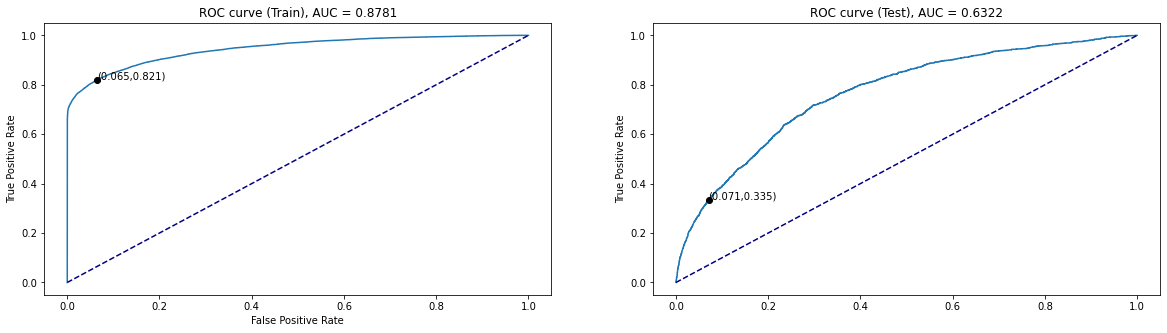

0.4542302427043093

In [42]:
y_test_pred_proba = lgb_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = lgb_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

The model illustrated a exelent accuraccy score which is also consistent from the train set to the validation set. The lightgbm model is one of the best model for this problems.

In [43]:
with open("model/lgb_clf.pkl", 'wb') as file:
    pickle.dump(lgb_clf, file)

#### 7. Model stacking

Finally, I will try to resemble the esemble machine learning methods by applied a stacked genelization model which is combined by different model. The result expected is the stacked model have higher accuraccy score than other model. 

In [47]:
from sklearn.ensemble import StackingClassifier

estimator = list()
estimator.append(('lr', LogisticRegression()))
estimator.append(('knn', KNeighborsClassifier()))
estimator.append(('rf', RandomForestClassifier()))
estimator.append(('gnb', GaussianNB()))

stack_clf = StackingClassifier(estimators=estimator, 
                               final_estimator=LogisticRegression(),
                               cv=5, n_jobs=4)


stack_clf.fit(X_train, y_train)

print('Best Score: ', stack_clf.score(X_val, y_val))


Best Score:  0.7946487042754233


In [48]:
acc, f1, recall = evaluate_model_performance(stack_clf, X_val, y_val)
model_score.append(['Stacking Classifier', acc, f1, recall])

model accuracy: 0.795
model f1-score: 0.349
model recall-score: 0.329


Train Accuracy: 0.9617830825698356 
Train AUC: 0.9617830825698355 
Train Confusion Matrix:
[[34478  1213]
 [ 1515 34176]]
Test Accuracy: 0.7940873795490692 
Test AUC: 0.6104345790270153 
Test Confusion Matrix:
[[7890 1011]
 [1190  598]]


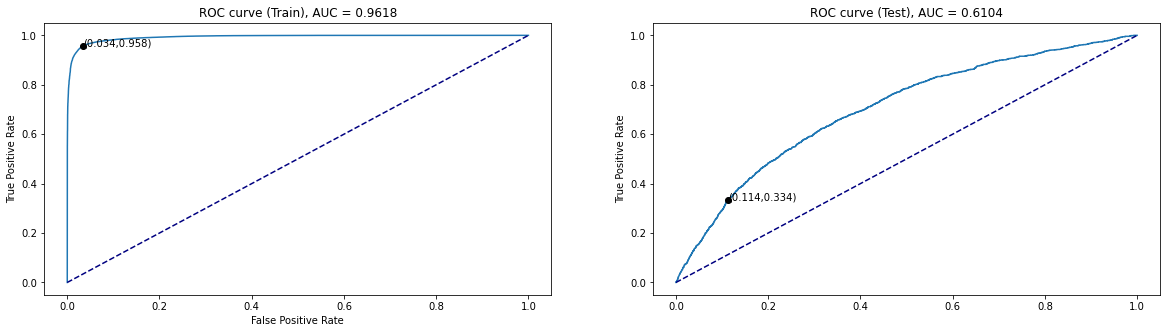

0.4942279189300045

In [49]:
y_test_pred_proba = stack_clf.predict_proba(X_val)[::,1]
y_train_pred_proba = stack_clf.predict_proba(X_train)[::,1]
plot_ROC(y_train, y_train_pred_proba, y_val, y_test_pred_proba)

The model show a good performance but it is not an improvement when train the model alone.

In [50]:
with open("model/stack_clf.pkl", 'wb') as file:
    pickle.dump(stack_clf, file)

### Model Evaluation

In [51]:
# Display the score of model with test data set
scores = pd.DataFrame(model_score, columns =['Model', 'Accuracy Score', 'F1 Score', 'Recall score'])
scores

,Model,Accuracy Score,F1 Score,Recall score
0,Gaussian Naive Bayes,0.317990,0.296060,0.857383
1,Logistic regression,0.831603,0.286281,0.201902
2,Adaboost classifier,0.833287,0.321401,0.236018
3,K-Nearest neighbours classifier,0.763215,0.290440,0.289709
4,Random Forest,0.806904,0.330305,0.284676
5,LightGBM,0.837403,0.355819,0.268456
6,Stacking Classifier,0.794649,0.349244,0.329418


From the table above, we can see all of the important evaluation metrics which are accuraccy, F1 score and recall score. In the next section, we can looking more detail about each of the metrics, but in overall, most of the model beside naive bayes have similar performance, however, the Naive Bayes based model have increasingly high recall score. 

<AxesSubplot:xlabel='Model', ylabel='Accuracy Score'>

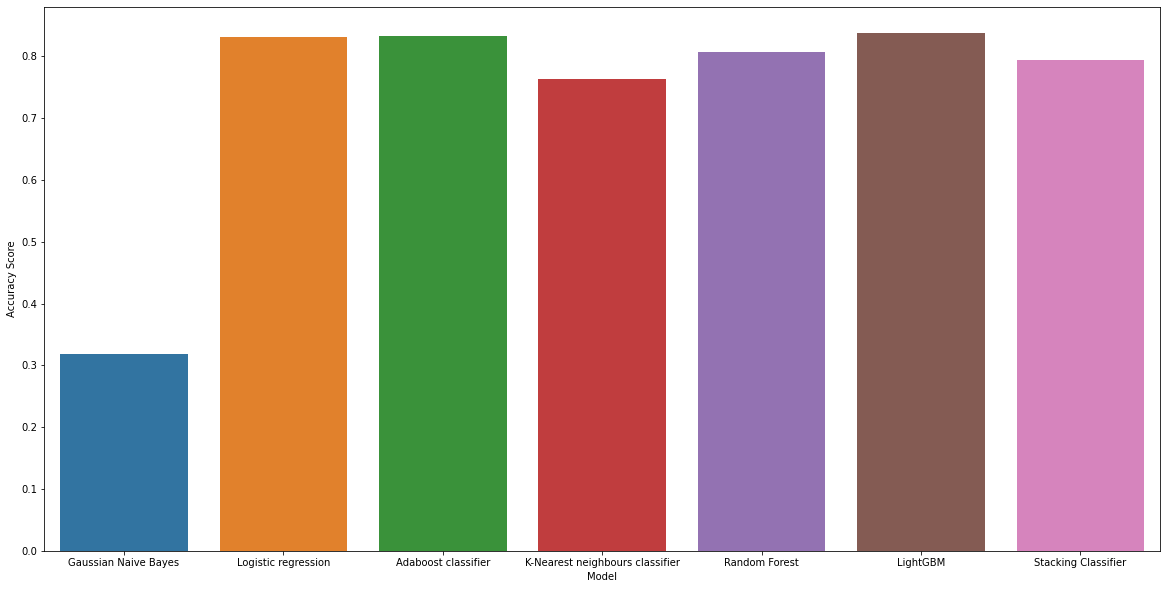

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=scores, x='Model', y='Accuracy Score',  ax=ax)

From the bar chart of the accuraccy score, we can see that the Naive Based model have lowest accuraccy score. The different between other model is not significant. However, the adaboost and lightGBM classifier show the highest accuracy overall. In addition, the Logistic regresion model's accuracy is slightly lower than the best model which is also a notable thing because the logistic is one of the most simple with smail trainning time in the list of model above.

<AxesSubplot:xlabel='Model', ylabel='Recall score'>

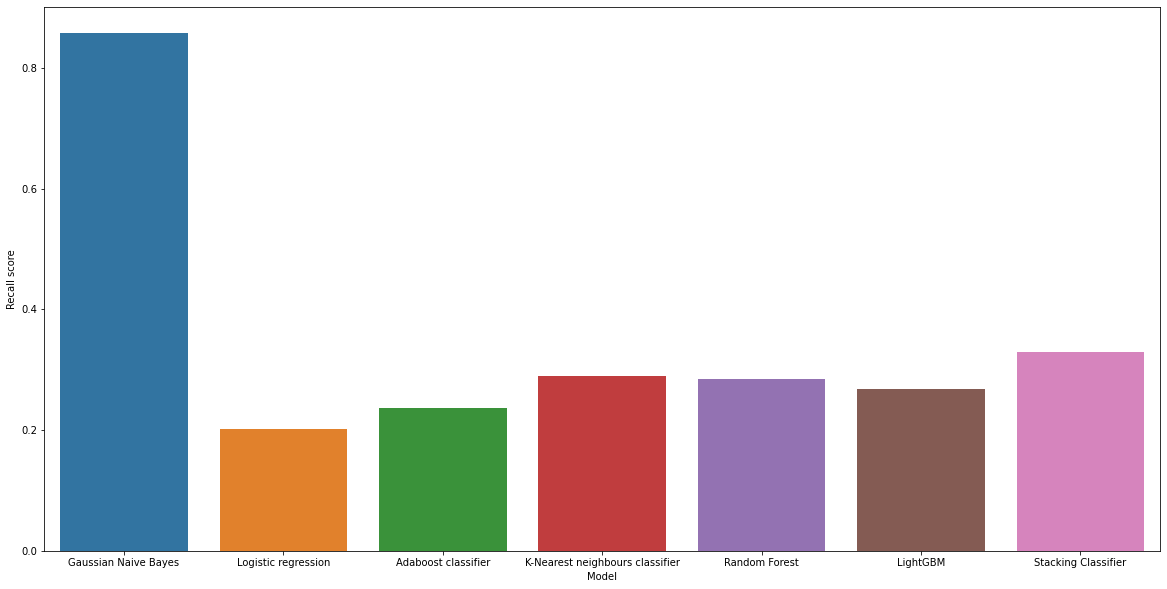

In [59]:
fig, ax = plt.subplots(figsize=(20,10))
sns.barplot(data=scores, x='Model', y='Recall score',  ax=ax)

As stated from the beginning of this notebook, we want to examine how well the model when predict the LOS of patient is over 3 days. The Gaussian Naive Bayes have the highest recall score where other model score is around 0.3. Therefore, event with high accuracy, most of the model is bad when classify the patient stay longer than 3 days. The reason for this problem is the imbalance data set from the beginning since the number of the patient stay under 3 days is five time higher than the other which let to the bad score in recall metrics. Although, I have performed over sampling technique using SMOTE methods, but it is not an optimize methods in this problems. It is also 
noteworthy that the stacked model have higher recall score than other, because the benefit of stacked model is it reduce bias and variance.

From the evaluation above, the best model which is balanced between the performance and efficient (recall and trainning time) is lightGBM. The model have one of the best accuracy and recall score out of 7 models and it not take many time to train. 


## Use the best model to evaluate test data set and export the data to Kaggle submission

In [60]:
# Data preprocessing for test data
def preprocessingTestData(data):
    '''
    Modify the data to increase the accuracy of model
    INPUT:
    data: the raw data set
    OUTPUT:
    df: cleaned data set
    '''
    df = data.copy()
    df = df.drop(['HealthServiceArea', 'ID'], axis=1)
    
    # Get list of categorical variables
    s = (df.dtypes == 'object')
    categorical_cols = list(s[s].index)
    
    # One hot encoded cateagorical features
    df = pd.get_dummies(df, columns = categorical_cols)
    df = df.drop(['TypeOfAdmission_Trauma', 'PaymentTypology_Department of Corrections'], axis=1)

    return df

In [61]:
test_data = pd.read_csv("./data/test_data.csv")
test_data = preprocessingTestData(test_data)
test_data

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,...,PaymentTypology_Federal/State/Local/VA,"PaymentTypology_Managed Care, Unspecified",PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_Miscellaneous/Other,PaymentTypology_Private Health Insurance,PaymentTypology_Self-Pay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,216,3,4900,3242,8966,2448,13196,34,1,0,...,0,0,1,0,0,0,0,0,1,0
1,220,1,3100,2611,9227,1751,8951,45,1,0,...,0,0,1,0,0,0,0,0,1,0
2,115,1,3300,3155,11381,1052,11314,74,0,1,...,0,0,1,0,0,0,0,0,1,0
3,228,1,3300,2611,9227,3790,6250,45,0,1,...,0,0,1,0,0,0,0,0,1,0
4,220,2,3800,3155,11381,3032,10135,59,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69172,115,1,3500,3623,7197,5123,22564,49,0,1,...,0,0,1,0,0,0,0,0,1,0
69173,0,2,3000,3623,7197,5123,22564,115,0,1,...,0,0,1,0,0,0,0,0,1,0
69174,0,1,3400,3623,7197,5123,22564,83,0,1,...,0,0,1,0,0,0,0,0,1,0
69175,115,1,2900,3623,7197,5123,22564,81,0,1,...,0,0,1,0,0,0,0,0,1,0


In [62]:
import re
test_data = test_data.rename(columns = lambda x:re.sub('[^A-Za-z0-9_]+', '', x))
test_data

,CCSProcedureCode,APRSeverityOfIllnessCode,BirthWeight,AverageCostInCounty,AverageChargesInCounty,AverageCostInFacility,AverageChargesInFacility,AverageIncomeInZipCode,Gender_F,Gender_M,...,PaymentTypology_FederalStateLocalVA,PaymentTypology_ManagedCareUnspecified,PaymentTypology_Medicaid,PaymentTypology_Medicare,PaymentTypology_MiscellaneousOther,PaymentTypology_PrivateHealthInsurance,PaymentTypology_SelfPay,PaymentTypology_Unknown,EmergencyDepartmentIndicator_N,EmergencyDepartmentIndicator_Y
0,216,3,4900,3242,8966,2448,13196,34,1,0,...,0,0,1,0,0,0,0,0,1,0
1,220,1,3100,2611,9227,1751,8951,45,1,0,...,0,0,1,0,0,0,0,0,1,0
2,115,1,3300,3155,11381,1052,11314,74,0,1,...,0,0,1,0,0,0,0,0,1,0
3,228,1,3300,2611,9227,3790,6250,45,0,1,...,0,0,1,0,0,0,0,0,1,0
4,220,2,3800,3155,11381,3032,10135,59,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69172,115,1,3500,3623,7197,5123,22564,49,0,1,...,0,0,1,0,0,0,0,0,1,0
69173,0,2,3000,3623,7197,5123,22564,115,0,1,...,0,0,1,0,0,0,0,0,1,0
69174,0,1,3400,3623,7197,5123,22564,83,0,1,...,0,0,1,0,0,0,0,0,1,0
69175,115,1,2900,3623,7197,5123,22564,81,0,1,...,0,0,1,0,0,0,0,0,1,0


In [63]:
y_test = lgb_clf.predict(test_data)

In [64]:
t_data = pd.read_csv("./data/test_data.csv")
result = pd.concat([pd.DataFrame(t_data['ID']), pd.DataFrame(y_test, columns=['LengthOfStay'])], axis=1)

In [65]:
result

,ID,LengthOfStay
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
69172,69173,0
69173,69174,0
69174,69175,0
69175,69176,0


In [66]:
result.to_csv('s3757281_prediction.csv', index=False)

After sumbitted, the result predited by the lightGBM have the accuraccy score 0.9343 which is the best score compare to the result of other models. 

## Conclusion

In conclusion, in this notebook several model is trained and have produce decent result. Before modelling the data, several data cleanning step are performed which are remove outlier, one hot encoded categoricals features and over sampling the train data. The lightGBM and Adaboost have the best accuraccy compare to other models and the best model for this problem is the lightGBM since it is the most efficient with good accuracy and recall score. However, the logistic regression had good result eventhough it is an elementary model. Throughout this assignment, I have applied the machine learning knowledge to solve real-world problem.